In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from tqdm import tqdm

In [2]:
plt.style.use("seaborn-pastel")

# 字体加载
font_path = r"C:\Users\lenovo\AppData\Local\Microsoft\Windows\Fonts\Alibaba-PuHuiTi-Regular.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
print(prop.get_name())  # 显示当前使用字体的名称

# 字体设置
font_manager.rcParams['font.family'] = 'sans-serif'  # 使用字体中的无衬线体
font_manager.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
font_manager.rcParams['font.size'] = 20  # 设置字体大小
font_manager.rcParams['axes.unicode_minus'] = False  # 使坐标轴刻度标签正常显示正负号

Alibaba PuHuiTi


In [6]:
data = pd.read_excel(r'./all_data.xlsx', sheet_name='all_data')

In [7]:
data.fillna(0, inplace=True)

# 数据信息

In [9]:
type_data = data.groupby('type').count()['url']
type_data = type_data.sort_values(ascending=False)

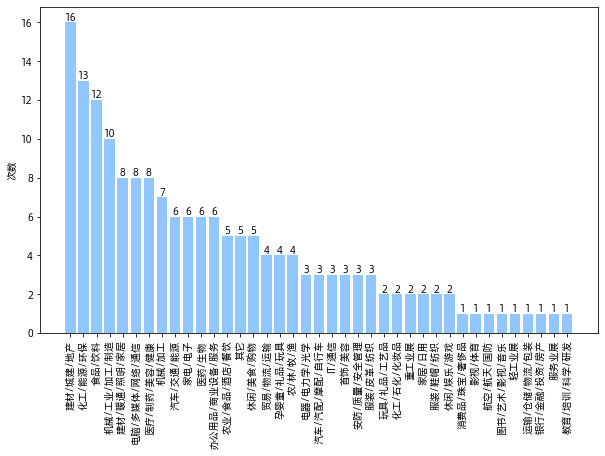

In [38]:
plt.figure(figsize=(10, 6))
x = np.arange(len(type_data))
plt.bar(x, type_data)
for i, j in zip(x, type_data.values):
    plt.text(i, j+0.1, j, ha='center')
plt.xticks(x, type_data.index, rotation=90)
plt.ylabel('次数')
plt.savefig('01_类别.svg')

In [43]:
yanqi_data = data.groupby('postpone').count()['url']

In [44]:
yanqi_data

postpone
否    121
是     51
Name: url, dtype: int64

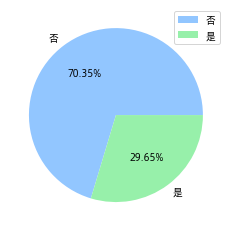

In [61]:
plt.pie(yanqi_data, labels=yanqi_data.index, autopct="%.2f%%")
plt.legend()
plt.savefig('01_是否延期.svg')

# 开始分析

## 官网

In [10]:
guanwang = data.groupby('官网').count()['url']

In [11]:
guanwang

官网
0     54
1    118
Name: url, dtype: int64

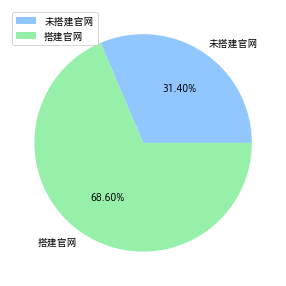

In [12]:
plt.figure(figsize=(5, 5))
plt.pie(guanwang, labels=['未搭建官网', '搭建官网'], autopct="%.2f%%")
plt.legend(loc=0)
plt.savefig('02_01_官网.svg')

## SEO

In [13]:
data_SEO = data.copy()

In [14]:
data_SEO = data[data_SEO['官网'] == 1]

In [95]:
for row in range(data_SEO.shape[0]):
    if data_SEO.loc[row, 'name'] == '中国进出口商品交易会':
        data_SEO.loc[row, '预计来路'] = 0
        data_SEO.loc[row, '百度权重'] = 0

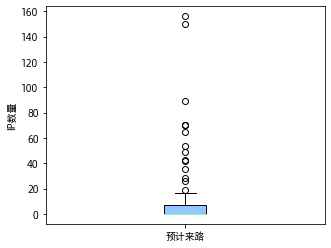

In [28]:
plt.figure(figsize=(5, 4))
plt.boxplot(data_SEO.sort_values('预计来路', ascending=False)['预计来路'][1:], patch_artist=True)
plt.ylabel('IP数量')
plt.xticks([1], ['预计来路'])
plt.savefig('02_02_预计来路.svg')

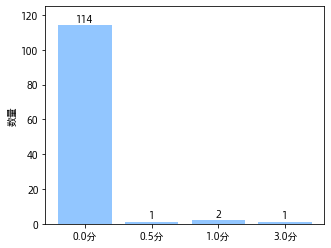

In [26]:
baiduw = data_SEO.groupby('百度权重').count()['url']
x = np.arange(len(baiduw))
plt.figure(figsize=(5, 4))
plt.bar(x,baiduw)
plt.xticks(x, [str(i) + '分' for i in baiduw.index])
for i, j in zip(x, baiduw.values):
    plt.text(i, j+2, j, ha='center')
plt.ylim(0, 125)
plt.ylabel('数量')
plt.savefig('02_02_百度权重.svg')

## 新闻媒体

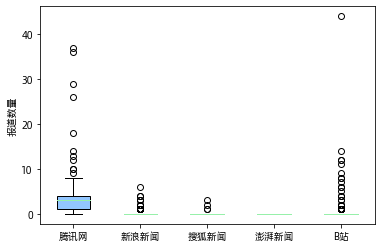

In [42]:
plt.boxplot(data.loc[:,['腾讯网','新浪新闻', '搜狐新闻', '澎湃新闻', 'B站']], patch_artist=True)
plt.xticks(np.arange(1, 6),['腾讯网','新浪新闻', '搜狐新闻', '澎湃新闻', 'B站'])
plt.ylabel('报道数量')
plt.savefig('02_03_社交媒体+B站.svg')

## 熵权法

In [63]:
data_arrary = data.loc[:, ['官网', '预计来路', '百度权重', '腾讯网', '新浪新闻', '搜狐新闻', 'B站']].to_numpy()

In [64]:
a = data_arrary.copy()  # 深拷贝数据矩阵，便于接下来的归一化

# 循环每一列
for j in range(data_arrary.shape[1]):
    # 比例变换
    a[:, j] = a[:, j] / max(a[:, j])  # 比例变换

In [65]:
a = a + np.finfo(np.float32).eps  # 加一个极小的数 防止0为底数报错
[n, m] = a.shape  # 取矩阵大小
cs = a.sum(axis=0)  # 逐列求和
P = 1 / cs * a  # 求特征比重矩阵
e = -(P * np.log(P)).sum(axis=0) / np.log(n)  # 计算熵值
g = 1 - e  # 计算差异系数
w = g / sum(g)  # 计算权重
F = P @ w  # 计算各对象的评价值
print("\nP={}\n,e={}\n,g={}\n,w={}\nF={}".format(P, e, g, w, F))


P=[[8.47457581e-03 8.21214706e-08 6.50225216e-08 ... 1.70298486e-08
  5.10892466e-08 2.83523414e-08]
 [1.01024804e-09 8.21214706e-08 6.50225216e-08 ... 1.70298486e-08
  5.10892466e-08 2.83523414e-08]
 [8.47457581e-03 8.21214706e-08 6.50225216e-08 ... 1.70298486e-08
  5.10892466e-08 2.83523414e-08]
 ...
 [8.47457581e-03 7.14010622e-03 6.50225216e-08 ... 2.38094711e-02
  4.28567714e-01 5.40540740e-03]
 [8.47457581e-03 8.21214706e-08 6.50225216e-08 ... 7.14283792e-02
  5.10892466e-08 1.08107864e-02]
 [8.47457581e-03 1.79776428e-02 6.50225216e-08 ... 1.70298486e-08
  5.10892466e-08 2.83523414e-08]]
,e=[0.9267976  0.31603993 0.227042   0.89281756 0.56012707 0.24811606
 0.58622504]
,g=[0.0732024  0.68396007 0.772958   0.10718244 0.43987293 0.75188394
 0.41377496]
,w=[0.02257358 0.21091426 0.23835874 0.03305208 0.13564457 0.23186009
 0.12759668]
F=[3.96326268e-04 1.53781279e-04 4.47569747e-04 1.03479123e-03
 1.03664639e-03 6.99754020e-04 3.22249023e-03 4.47569747e-04
 1.91352350e-04 7.865517

In [66]:
data['评价值'] = F  # 保存评价值到表格
data.sort_values('评价值', ascending=False, inplace=True)  # 评价值排序
data['排名'] = np.arange(data.shape[0]) + 1  # 排名值
data.sort_index(inplace=True)  # 还原之前的顺序

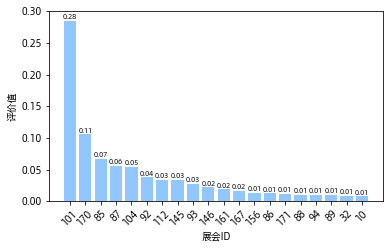

In [98]:
data_draw = data.sort_values('评价值', ascending=False).iloc[:20, :]  # 提取画图的数据
x = np.arange(data_draw.shape[0])  # x 轴值
plt.figure(figsize=(6, 3.5))
plt.bar(x, data_draw['评价值'])  # 画图
plt.xticks(x, data_draw['index'], rotation='45')  # x轴刻度名
for i, j in zip(x, data_draw['评价值']):
    plt.text(i, j+0.003, '%.2f' % j, ha='center', size=7)
plt.ylim(0, 0.3)
plt.xlabel('展会ID')  # 横坐标标题
plt.ylabel('评价值')  # 纵坐标标题
plt.savefig('02_04_熵权法.svg')  # 保存

In [99]:
data.to_excel('result.xlsx')

# 最后的图

In [4]:
data = pd.read_excel('./result - 副本.xlsx', sheet_name='待归一化数据')

In [5]:
data

,预计来路,百度权重,腾讯网,新浪新闻,搜狐新闻,B站,评价值
0,0.0,0.0,5,0,0,0,0.000448
1,0.0,0.0,0,0,0,0,0.000191
2,0.0,0.0,2,0,0,1,0.000792
3,1.0,0.0,4,4,0,4,0.016127
4,0.0,0.0,0,0,0,0,0.000191
...,...,...,...,...,...,...,...
167,0.0,0.0,3,0,0,0,0.000345
168,0.0,0.0,14,0,0,0,0.000909
169,2.5,0.0,1,0,0,0,0.000377
170,0.0,0.0,1,0,0,0,0.000243


In [6]:
a = np.zeros(shape=data.shape)

In [15]:
for index, col in enumerate(data.columns):
    for row in range(data.shape[0]):
        a[row][index] = (data.loc[row][col] - min(data[col])) / (max(data[col]) - min(data[col]))

In [16]:
a

array([[0.        , 0.        , 0.13513514, ..., 0.        , 0.        ,
        0.00157474],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00067316],
       [0.        , 0.        , 0.05405405, ..., 0.        , 0.02272727,
        0.0027876 ],
       ...,
       [0.00092541, 0.        , 0.02702703, ..., 0.        , 0.        ,
        0.00132661],
       [0.        , 0.        , 0.02702703, ..., 0.        , 0.        ,
        0.00085347],
       [0.00037016, 0.        , 0.02702703, ..., 0.        , 0.02272727,
        0.00346969]])

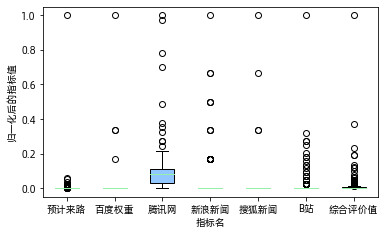

In [31]:
plt.figure(figsize=(6, 3.5))
plt.boxplot(a, patch_artist=True)
plt.xticks(np.arange(1, 8), list(data.columns)[:-1] + ['综合评价值'])
plt.xlabel('指标名')
plt.ylabel('归一化后的指标值')
plt.savefig('03_01_归一化综合分析.svg')